Try and find two catgeories that can be combined.

In [2]:
from pathlib import Path
# Load the softmax encodings of the data

from simcoder.similarity import load_mf_encodings

smData = load_mf_encodings(Path('/Volumes/Data/mf_resnet50_softmax'))

# Load the data

allData = load_mf_encodings(Path("/Volumes/Data/mf_dino2")) # load encodings

from simcoder.similarity import l1_norm

allData = l1_norm(allData)


999128 269098 205819
614567 91563 339992


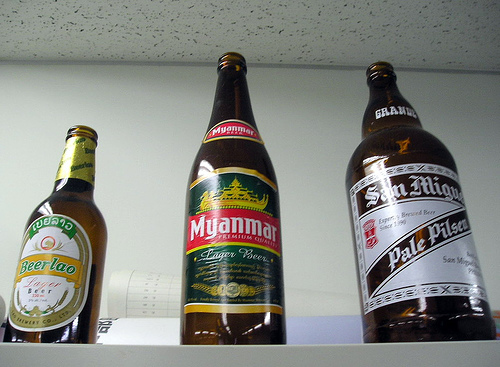

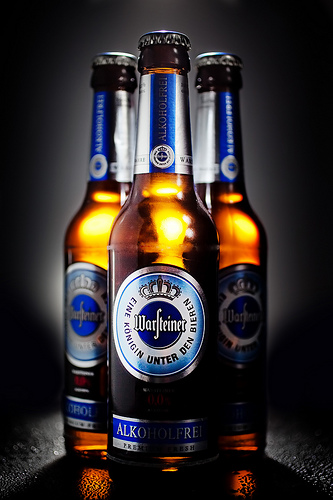

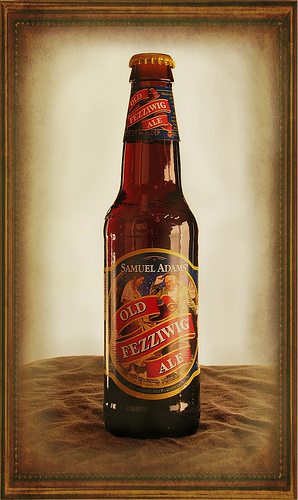

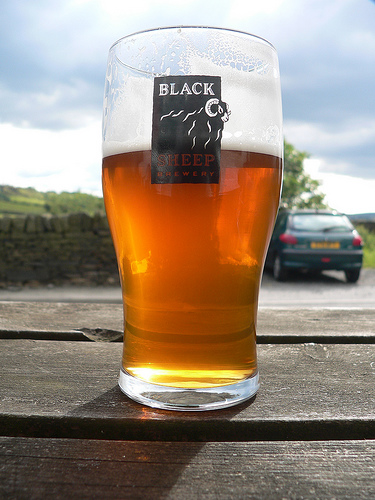

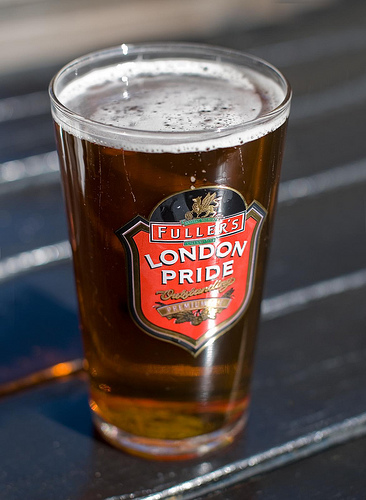

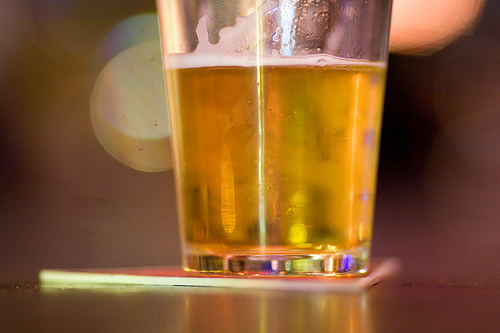

In [3]:
from simcoder.count_cats import get_best_cat_index
from simcoder.similarity import get_mf_image

# subtract 1 from the file numbers

cat1 = 440 # beer bottle
cat2 = 441 # beer glass

indexes_for_cat1 = get_best_cat_index(cat1,smData)
indexes_for_cat2 = get_best_cat_index(cat2,smData)

bot_index1 = indexes_for_cat1[0]
bot_index2 = indexes_for_cat1[1]   # bottles
bot_index3 = indexes_for_cat1[2]

print( bot_index1,bot_index2,bot_index3 )

glass_index1 = indexes_for_cat2[0]
glass_index2 = indexes_for_cat2[1]   # glasses
glass_index3 = indexes_for_cat2[3]

print( glass_index1,glass_index2,glass_index3 )

display(get_mf_image(bot_index1))
display(get_mf_image(bot_index2))
display(get_mf_image(bot_index3))
display(get_mf_image(glass_index1))
display(get_mf_image(glass_index2))
display(get_mf_image(glass_index3))

In [4]:
from simcoder.msedOO import msed
import numpy as np

base_data = np.vstack((allData[bot_index1],allData[bot_index2],allData[bot_index3],allData[glass_index1],allData[glass_index2],allData[glass_index3]))   

base = msed(base_data)  # form the base simplex 

complexities = base.msed(allData)


In [5]:

complexities = complexities.flatten()   # <<< these are all matrices of matrices shouldn't be.
indices = np.argsort(complexities)      # lowest is first
top_100 = indices[0:100]


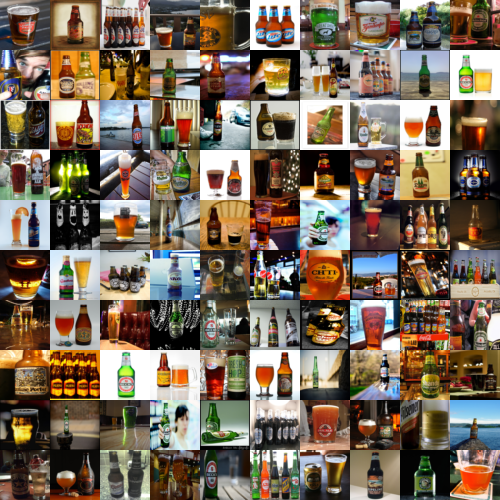

In [6]:
from simcoder.similarity import make_mf_image_grid

make_mf_image_grid(top_100,10,10,50,50)

In [19]:


from simcoder.count_cats import countNumberinCatGTThresh, count_number_in_results_cated_as, count_number_in_results_in_cat


max_possible_in_beer = countNumberinCatGTThresh(cat1,0.9,smData)
max_possible_in_glass = countNumberinCatGTThresh(cat2,0.9,smData)

print(f"num beer in data {max_possible_in_beer}")
print(f"num glass in data {max_possible_in_glass}")

count_number_in_results_cated_as_beer = count_number_in_results_cated_as(cat1, top_100, smData)
count_number_in_results_cated_as_glass = count_number_in_results_cated_as(cat2, top_100, smData)

print(f"num beer in res {count_number_in_results_cated_as_beer}")
print(f"num glass in res {count_number_in_results_cated_as_glass}")

count_number_in_results_cated_as_beer = count_number_in_results_in_cat(cat1, 0.9, top_100, smData)
count_number_in_results_cated_as_glass = count_number_in_results_in_cat(cat2, 0.9, top_100, smData)

print(f"num beer 0.9 in res {count_number_in_results_cated_as_beer}")
print(f"num glass 0.9 in res {count_number_in_results_cated_as_glass}")


num beer in data 88
num glass in data 157
num beer in res 2
num glass in res 91
num beer 0.9 in res 0
num glass 0.9 in res 58


/Users/al/repos/simcoder-pytorch/simcoder/msedOO.py:17: RuntimeWarning: overflow encountered in exp
  C = np.exp(cs)                              # C is of shape matrix of no_of_objects,1 print(f"C shape {C.shape}")


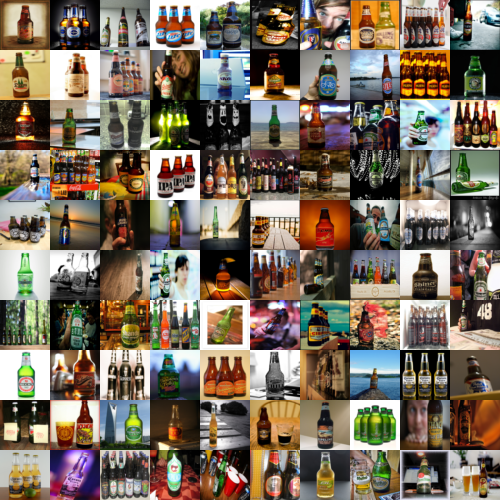

In [7]:
# now try just bottles

base_data = np.vstack((allData[bot_index1],allData[bot_index2],allData[bot_index3]) )  

base = msed(base_data)  # form the base simplex 
complexities = base.msed(allData)
complexities = complexities.flatten()   # <<< these are all matrices of matrices shouldn't be.
indices = np.argsort(complexities)      # lowest is first
top_100 = indices[0:100]
make_mf_image_grid(top_100,10,10,50,50)

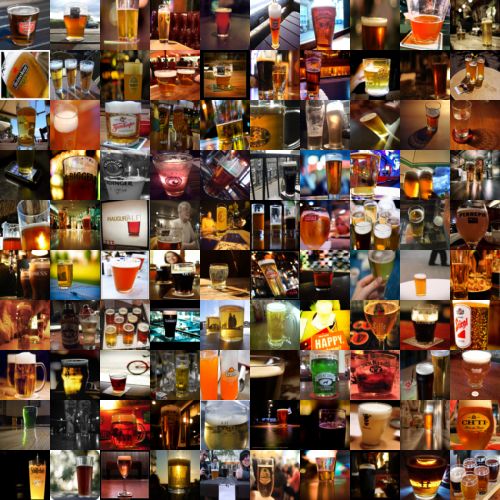

In [8]:
# now try just glasses

base_data = np.vstack((allData[glass_index1],allData[glass_index2],allData[glass_index3]) )  

base = msed(base_data)  # form the base simplex 
complexities = base.msed(allData)
complexities = complexities.flatten()   # <<< these are all matrices of matrices shouldn't be.
indices = np.argsort(complexities)      # lowest is first
top_100 = indices[0:100]
make_mf_image_grid(top_100,10,10,50,50)